<a href="https://colab.research.google.com/github/sohyunizi/TIL/blob/main/BigQuery_bquxjob_36c1246e_186b6da0d31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'wide-silo-379810' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=wide-silo-379810:US:bquxjob_36c1246e_186b6da0d31)
back to BigQuery to edit the query within the BigQuery user interface.

In [29]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_36c1246e_186b6da0d31') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT 
  position_id
  , position
  , SPLIT(SPLIT(jd,'주요업무')[safe_offset(1)], '자격요건')[safe_offset(0)] AS responsibilities
  , SPLIT(SPLIT(SPLIT(jd,'주요업무')[safe_offset(1)], '자격요건')[safe_offset(1)], '우대사항')[safe_offset(0)] AS requirements
  , SPLIT(SPLIT(SPLIT(SPLIT(jd, '주요업무')[safe_offset(1)], '자격요건')[safe_offset(1)], '우대사항')[safe_offset(1)], '혜택 및 복지')[safe_offset(0)] AS preference
  , annual_from
  , annual_to
  , GENERATE_ARRAY(annual_from, annual_to, 1) AS target_annual 
  FROM `wide-silo-379810.wanted_data_challenge.wanted_position` 
#where 쓰지 않도록 하겠습니다.

#position_id | position | responsisilities | requiremants | preference | annual_from | annual_to | target_annual
#회사소개, 주요업무, 자격요건, 우대사항, 복지 및 혜택



# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [31]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_36c1246e_186b6da0d31') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,position_id,position,responsibilities,requirements,preference,annual_from,annual_to,target_annual
0,141026,[겨울인턴] Data Analyst,\n1. 데이터 추출 및 분석 지원\n\n• 실무팀 과제 수행에 필요한 데이터 추출...,"\n• 온라인 비즈니스 데이터 분석 방법에 대한 이해도가 높은 분 (AARRR, R...","\n• R, Python 등의 고수준 스크립트 언어 활용 능력을 보유하신 분\n• ...",0,1,"[0, 1]"
1,121637,Data Analyst (신입),"\n• 전사적으로 데이터에 기반한 최적의 서비스적인, 사업적인 의사결정을 내릴 수 ...","\n• 사용자분들께 정말 좋은 서비스, 놀라운 경험을 제공하고 싶은 마음을 가지신 ...",\n• 실제 모바일 서비스 관련 데이터 분석 업무 경험이 있으신 분\n• Table...,0,1,"[0, 1]"
2,117995,[하계인턴] 데이터분석가,\n• 데이터분석팀 팀원들과 함께 머신러닝 기반 자동 재배치 시스템 개발 프로젝트에...,\n• Python을 활용한 데이터 분석과 지도학습 머신러닝 모델을 수립한 경험이 ...,\n• 공공 자전거 데이터 혹은 공간 데이터를 다루거나 분석한 경험이 있으신 분\n...,0,1,"[0, 1]"
3,115354,[하계인턴] Data Analyst,\n[콴다 Data Analyst의 역할은?] \n• 목적 조직이 맡은 서비스/비즈...,"\n[이런 분이면 좋겠습니다.]\n• Raw data를 가지고, 원하는 schema...",\n[기타 사항]\n• 제출 서류: 자유 양식의 국문 이력서(PDF)\n• 근무 형...,0,1,"[0, 1]"
4,115258,[하계인턴] Data Analyst,"\n• Raw data를 가지고, 원하는 schema 의 data로 가공하는 데 능...",\n[콴다 Data Analyst의 역할은?]\n•목적 조직이 맡은 서비스/비즈니스...,None,0,1,"[0, 1]"
...,...,...,...,...,...,...,...,...
383,55084,데이터 분석 (Data Analyst),"\n- 데이터 분석 로드맵 기획 및 데이터 마이닝\n- 데이터 분석 프로젝트 리딩,...",\n- 데이터 분석 관련 경력(8년~11년)을 보유하신 분 (현 데이터 관련 부서 ...,\n- 온라인/모바일 D2C 혹은 구독 서비스 업무 경험을 보유하신 분\n- DBA...,8,11,"[8, 9, 10, 11]"
384,135610,Data Analystics / Business Inteligence (DA/BI),\n1. 멤버스 및 고객마스터 DB/시스템 운영 \n- 외부 플랫폼 및 타시스템과 ...,\n• 커머스 플랫폼 운영 및 프로젝트 수행 경험이 있는 분\n• SAP 기간계 시...,\n• 멤버스 및 고객마스터 DB/시스템 구축 경험이 있는 분\n• 고객 데이터 분...,8,12,"[8, 9, 10, 11, 12]"
385,127718,"요기요 익스프레스 Data 전략 팀장(Data Analyst,8년 이상)",\n[ ​요기요 익스프레스Data 전략팀 목표] \n\n• Own Delivery ...,\n• 관련 경력 8년(최소 6년) 이상 또는 그에 준하는 역량을 보유하신분\n• ...,"\n• 전략/기획 업무 경험이 있으신분\n• Big Query, Google Dat...",8,15,"[8, 9, 10, 11, 12, 13, 14, 15]"
386,61427,"Staff, Data Analyst (Customer Experience Produ...",\n※ 영문이력서 필수\n\n• 대규모의 정형 및 비정형 데이터 분석을 통해 명확하...,"\n※ 영문이력서 필수\n\n• 통계, 수학, 컴퓨터 공학, 데이터 관련 분야 학사...","\n※ 영문이력서 필수\n\n• 정량적 분야의 학사 학위 소지자(통계학, 공학, 비...",8,15,"[8, 9, 10, 11, 12, 13, 14, 15]"


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [32]:
results.describe()

,position_id,annual_from,annual_to
count,388.000000,388.000000,388.000000
mean,86662.932990,2.548969,11.293814
std,32339.246062,1.735828,15.518307
min,33147.000000,0.000000,1.000000
25%,56930.250000,1.000000,5.000000
50%,87868.500000,3.000000,10.000000
75%,110374.500000,3.000000,10.000000
max,146629.000000,10.000000,99.000000


In [35]:
!pip install krwordrank 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import pandas as pd
import matplotlib.pyplot as plt  
from krwordrank.word import KRWordRank
import numpy as np

df = results.copy()  #results 복사 dataframe

df['responsibilities']= df['responsibilities'].replace(np.nan,  '없음')
df['requirements'] = df['requirements'].replace(np.nan, '없음')
df['preference'] = df['preference'].replace(np.nan, '없음')

df.head(5)  #가장 상단의 5줄만 보여줘

,position_id,position,responsibilities,requirements,preference,annual_from,annual_to,target_annual
0,141026,[겨울인턴] Data Analyst,\n1. 데이터 추출 및 분석 지원\n\n• 실무팀 과제 수행에 필요한 데이터 추출...,"\n• 온라인 비즈니스 데이터 분석 방법에 대한 이해도가 높은 분 (AARRR, R...","\n• R, Python 등의 고수준 스크립트 언어 활용 능력을 보유하신 분\n• ...",0,1,"[0, 1]"
1,121637,Data Analyst (신입),"\n• 전사적으로 데이터에 기반한 최적의 서비스적인, 사업적인 의사결정을 내릴 수 ...","\n• 사용자분들께 정말 좋은 서비스, 놀라운 경험을 제공하고 싶은 마음을 가지신 ...",\n• 실제 모바일 서비스 관련 데이터 분석 업무 경험이 있으신 분\n• Table...,0,1,"[0, 1]"
2,117995,[하계인턴] 데이터분석가,\n• 데이터분석팀 팀원들과 함께 머신러닝 기반 자동 재배치 시스템 개발 프로젝트에...,\n• Python을 활용한 데이터 분석과 지도학습 머신러닝 모델을 수립한 경험이 ...,\n• 공공 자전거 데이터 혹은 공간 데이터를 다루거나 분석한 경험이 있으신 분\n...,0,1,"[0, 1]"
3,115354,[하계인턴] Data Analyst,\n[콴다 Data Analyst의 역할은?] \n• 목적 조직이 맡은 서비스/비즈...,"\n[이런 분이면 좋겠습니다.]\n• Raw data를 가지고, 원하는 schema...",\n[기타 사항]\n• 제출 서류: 자유 양식의 국문 이력서(PDF)\n• 근무 형...,0,1,"[0, 1]"
4,115258,[하계인턴] Data Analyst,"\n• Raw data를 가지고, 원하는 schema 의 data로 가공하는 데 능...",\n[콴다 Data Analyst의 역할은?]\n•목적 조직이 맡은 서비스/비즈니스...,없음,0,1,"[0, 1]"


In [41]:
texts = df['responsibilities'].values.tolist()

In [42]:
wordrank_extractor = KRWordRank(
 min_count = 3,    #단어 최소 출현 빈도수 
 max_length = 15,  # 단어의 character 길이의 최대 값
 verbose = True
)

beta = 0.85  # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter) #함수 실행 시 키워드, 랭크, 그래프를 output으로 뱉어줍니다

stopwords = {'대한','분이면', '있습니다.','분석','데이터', '위한', 'and', '통해', '통한','있는','the','to','in','for','of'}  #걸렀으면 하는 stopwords
passwords = {word:score for word, score in sorted(   
keywords.items(), key=lambda x:-x[1])[:100] if not (word in stopwords)}  #stopwords는 제외된 keywords 탑 300개

for word, r in sorted(passwords.items(), key=lambda x:x[1], reverse=True)[:30] :  #자주 반복되는 단어 top 30개 추출해서 프린트까지
  print((word,r))

scan vocabs ... 
num vocabs = 6568
done
('서비스', 15.202630480085666)
('비즈니스', 12.546394528844358)
('기반', 12.48102392481802)
('다양한', 11.27943657997832)
('인사이트', 10.696588096345518)
('도출', 10.411450488218929)
('지표', 10.296794302156378)
('개선', 9.735041759623096)
('의사결정을', 9.275961712442633)
('설계', 8.46398044553978)
('이를', 8.398359607488668)
('결과를', 7.7756524817194625)
('business', 7.53143728461156)
('위해', 7.339724834843432)
('client', 7.196419317411325)
('가설을', 7.187656907687089)
('필요한', 7.109461869847066)
('A/B', 6.859458621780232)
('프로', 6.82620218198466)
('KPI', 6.673034591123699)
('테스트', 6.235889581592421)
('함께', 6.207741683806032)
('고객', 6.164251641825263)
('제공', 6.020193669641287)
('주요', 5.996682957807703)
('on', 5.979489912074145)
('운영', 5.926796451775086)
('업무', 5.892673447537384)
('개발', 5.8318883400849275)
('대시', 5.819850602682456)


In [43]:
#한글폰트 지원이 되지 않기 때문에 별도로 이걸 깔아줘야한다.
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
#mpl.font_manager._rebuild()
#[출처] [Google Colab] 구글 코랩 한글 적용 문제 대응, Matplotlib|작성자 넬티아

fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


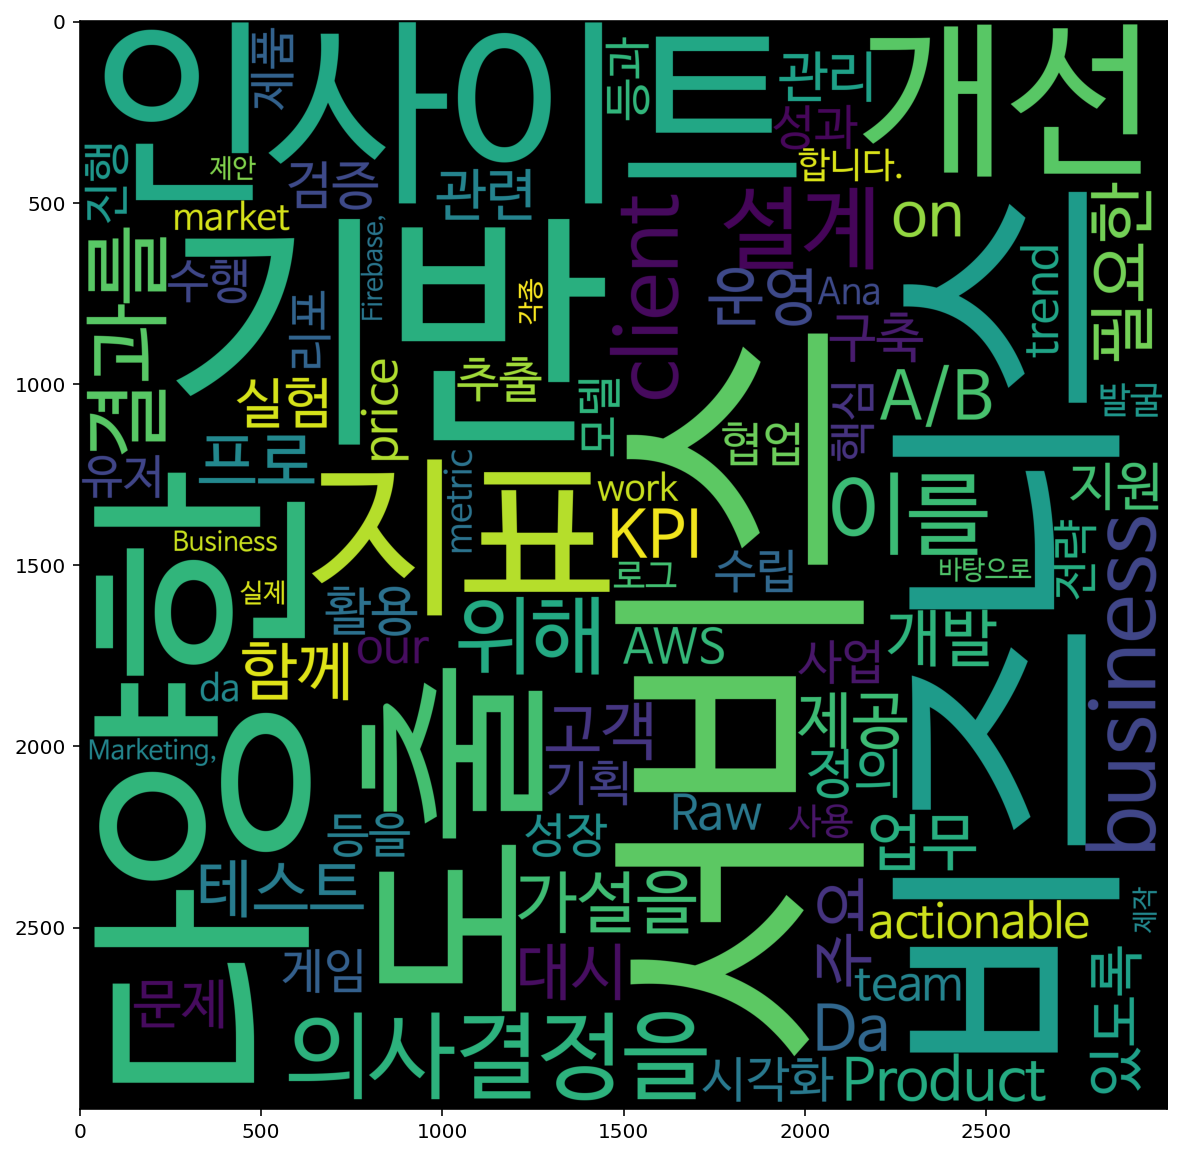

In [44]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

wc = WordCloud(font_path=fontpath, width = 1000, height = 1000, scale = 3.0, max_font_size = 250)
gen = wc.generate_from_frequencies(passwords)
plt.figure(figsize = (10, 10))
plt.imshow(gen)

In [45]:
req = df['requirements'].values.tolist()
print(req)

['\n• 온라인 비즈니스 데이터 분석 방법에 대한 이해도가 높은 분 (AARRR, Retention, Cohort, Funnel, LTV 등)\n• SQL을 통한 데이터 추출에 능숙하고, 복잡한 Raw data를 신속히 처리하여 결과물을 만들어낼 수 있는 분\n• 데이터 시각화 툴에 대한 이해와 경험이 있는 분 (Tableau, Redash 등)\n\n', '\n• 사용자분들께 정말 좋은 서비스, 놀라운 경험을 제공하고 싶은 마음을 가지신 분\n• 데이터와 데이터베이스에 관한 관심과 이해를 갖추신 분\n• SQL 구현 역량을 갖추신 분\n• 모바일, 온라인 서비스를 좋아하고 꾸준히 사용하시는 분\n• 서비스의 사용성과 성장을 위해 빠른 시도로 다양한 가설을 설정하실 수 있고, 실험하실 수 있으신 분\n• 데이터를 명확하고, 유연하게 커뮤니케이션하고 설득을 할 수 있는 능력을 보유하신 분\n\n', '\n• Python을 활용한 데이터 분석과 지도학습 머신러닝 모델을 수립한 경험이 있으신 분\n•  공유 퍼스널 모빌리티(PM) 서비스에 관심을 갖고 일레클 서비스의 다양한 데이터를 분석하고 싶으신 분\n\n', '\n[이런 분이면 좋겠습니다.]\n• Raw data를 가지고, 원하는 schema 의 data로 가공하는 데 능숙하신 분이면 좋겠습니다 : 현재 저희는 Google Cloud의 BigQuery라는 데이터 웨어하우스 솔루션을 사용하고 있고, BigQuery는 SQL로 사용하는 데이터 웨어하우스여서, 이왕이면 "SQL 로" data를 가공하는 데 능숙하신 분이면 좋겠습니다.\n• 서비스/비즈니스를 개선하는 것에 대해 수시로 생각하는 분이면 좋겠습니다 : 앱/웹 서비스를 사용하며, \'이 업데이트의 의도는 무엇일까?\', \'관련해서 이 서비스를 운영하는 회사에서는 어떤 데이터를 어떤 schema 로 수집하여 어떤 metric 을 집계하고 있을까?\', \'서비스에 이러한 기능을 추가해보면 좋지 않을까?\', \'그 성과는 어떻게 측정할 수 있을까?\' 같

In [46]:
 
wordrank_extractor = KRWordRank(
 min_count = 3,    #단어 최소 출현 빈도수 
 max_length = 15,  # 단어의 character 길이의 최대 값
 verbose = True
)

beta = 0.85  # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(req, beta, max_iter) #함수 실행 시 키워드, 랭크, 그래프를 output으로 뱉어줍니다

stopwords = {'분석','데이터', '위한', '대한', '경험', '등)','이상','관련','활용','of','있으신', '있는','이해','등을','and','in'}
passwords = {word:score for word, score in sorted(   
keywords.items(), key=lambda x:-x[1])[:100] if not (word in stopwords)}  #stopwords는 제외된 keywords 탑 300개

for word, r in sorted(passwords.items(), key=lambda x:x[1], reverse=True)[:30] :  #자주 반복되는 단어 top 30개 추출해서 프린트까지
  print((word,r))

scan vocabs ... 
num vocabs = 5476
done
('SQL', 11.237106331545888)
('Cohort,', 8.956596304813562)
('to', 8.726247075468459)
('능력', 8.461686023777997)
('서비스', 8.457139019669123)
('통해', 8.073923807402563)
('사용', 7.633931880248395)
('업무', 6.863940538710244)
('등의', 6.5160508134170145)
('다양한', 6.392979061486419)
('문제', 6.38005105694187)
('결과를', 6.302837278601735)
('커뮤니케이션', 6.176695680418025)
('비즈니스', 5.9258084462390865)
('Analytics,', 5.849550933130022)
('경력', 5.720425607331227)
('Python,', 5.696909749349934)
('원활한', 5.67337978959779)
('R,', 5.4463247256390295)
('A/B', 5.399136823992817)
('역량', 5.252382280248482)
('또는', 5.12689105623484)
('인사이트를', 5.067017294790931)
('BI', 4.928162776791955)
('기반', 4.8858973610514465)
('가능', 4.850751258204137)
('보유', 4.706812869726787)
('or', 4.628870251426493)
('도출', 4.31631579426997)
('통한', 4.280039126113752)


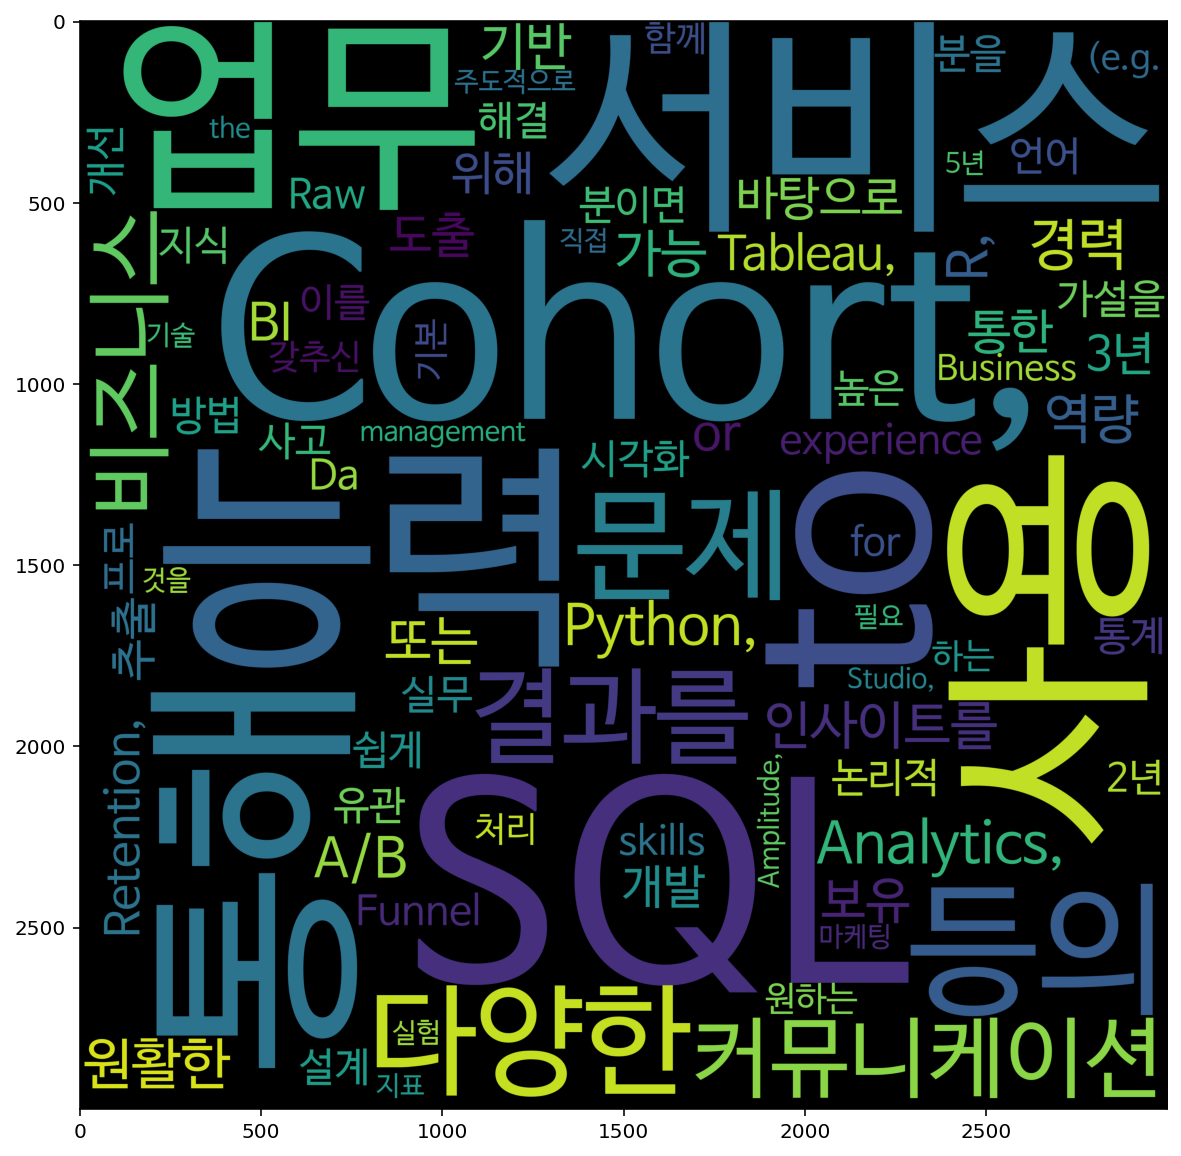

In [47]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

wc = WordCloud(font_path=fontpath, width = 1000, height = 1000, scale = 3.0, max_font_size = 250)
gen = wc.generate_from_frequencies(passwords)
plt.figure(figsize = (10, 10))
plt.imshow(gen)